In [3]:
from pathlib import Path

import torch
import torchvision.transforms as transforms

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [3]:
train_data_path = "./data/train.csv"
df = pd.read_csv(train_data_path)

features = df.drop(columns=["label"])
label = df["label"]


In [4]:
# torch.Tensor(df.to_numpy()).view(28, 28, -1)

images = torch.Tensor(features.to_numpy()).view(-1, 1, 28, 28) / 255
labels = torch.Tensor(label.to_numpy())

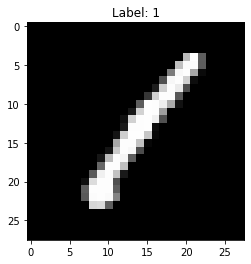

In [5]:
plt.title(f"Label: {int(labels[0].item())}")
plt.imshow(images[0].squeeze(), cmap="gray")

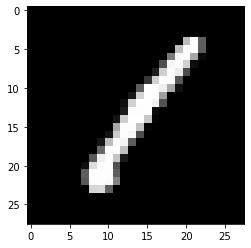

In [53]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(28, scale=(.01, .4)),
    transforms.ColorJitter()
])

plt.imshow(images[0].squeeze(), cmap="gray")


images_3d = images.squeeze(1).view(-1, 28, 28, 28)

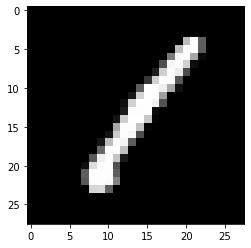

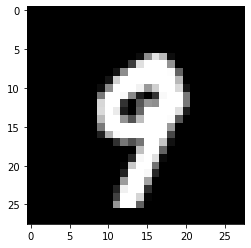

<Figure size 720x720 with 0 Axes>

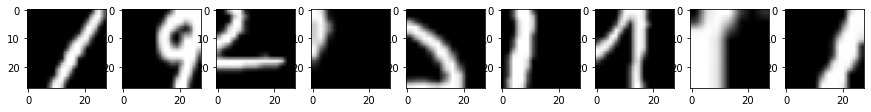

In [ ]:
plt.imshow(images_3d[1][0], cmap="gray")
plt.show()
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(1, 9, figsize=(15,15))
torch.manual_seed(42)

for i in range(9):
    ax[i].imshow(train_transform(images_3d)[i][0], cmap="gray")

In [ ]:
import monai.transforms as transforms
from monai.data import Dataset

transforms.Compose([
    transforms.LoadImageD(keys=["image", "label"]),
    transforms.RandFlipD(keys=["image", "label"]),
    transforms
])

In [ ]:
import monai
from monai.transforms import transforms
from typing import *
import torchvision

class RandomResizedCrop:
    def __init__(self, size=Tuple[int, int, int], scale=Tuple[float, float]) -> None:
        self.scale = scale
        self.transform = transforms.Compose([
            torchvision.transforms.RandomApply([
                transforms.Resize(spatial_size=224)]),
            
        ])
        
    def __call__(self, x):
        pass
        
class RandomHorizontalFlip:
    def __init__(self, p) -> None:
        self.transform = transforms.RandFlip(prob=p, spatial_axis=0)
        
    def __call__(self, x):
        return self.transform(x)
        
class RandomGrayscale:
    def __init__(self, p) -> None:
        pass      


class DataAugmentationDINO3D:
    def __init__(self, local_crop_scale, global_crop_scale) -> None:
        pass

In [ ]:
# Conversion 